In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

In [2]:
import time
import os

from datetime import date
from datetime import timedelta
from datetime import datetime

import pickle

import json

import pandas as pd
import numpy as np
import random 


import pandas_ta as ta

import mplfinance as mpf 

In [3]:
from handle_data.read_data import load_candles

In [4]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
#pd.set_option('display.width', 1000)

In [5]:
symbol = "BTC/USDT"
#symbol = "ETH/USDT"
timeframe='1h'
exchange='Binance'

In [6]:
history_days = 50 * 30
#history_days = 150

start_date = (date.today() - timedelta(days=history_days)).strftime('%Y-%m-%d')
end_date=None

#start_date ="2024-01-15"
#end_date = "2024-01-17"

#start_date = "2019-11-01"

print("start_date:",start_date)
print("end_date:",end_date)

start_date: 2019-12-13
end_date: None


In [7]:
data = load_candles(exchange, symbol, timeframe=timeframe, start_date=start_date, end_date=end_date, )

reading /home/jovyan/work/data/BTC-USDT/1h/BTC-USDT_1h_Binance.pickle


In [8]:
#mpf.plot(data, type='candle', volume=True,) 

In [9]:
#data

In [10]:
data['hour'] = data.index.hour
data['var'] = ((data['High'] - data['Low']) /  data['Open']) * 100
data

,Open,High,Low,Close,Volume,hour,var
Open time,,,,,,,
2019-12-13 00:00:00,7197.76,7216.93,7196.02,7197.66,776.188121,0,0.290507
2019-12-13 01:00:00,7197.66,7211.08,7190.76,7204.94,686.628995,1,0.282314
2019-12-13 02:00:00,7204.16,7218.98,7199.57,7212.72,724.867968,2,0.269428
2019-12-13 03:00:00,7213.37,7236.50,7208.42,7229.10,1125.165502,3,0.389277
2019-12-13 04:00:00,7229.10,7247.62,7225.05,7227.43,1273.970481,4,0.312210
...,...,...,...,...,...,...,...
2024-01-20 05:00:00,41607.19,41646.46,41564.81,41627.63,453.583649,5,0.196240
2024-01-20 06:00:00,41627.62,41698.71,41615.92,41672.02,582.853760,6,0.198882
2024-01-20 07:00:00,41672.02,41774.00,41644.72,41650.95,638.343506,7,0.310232


<Axes: xlabel='hour'>

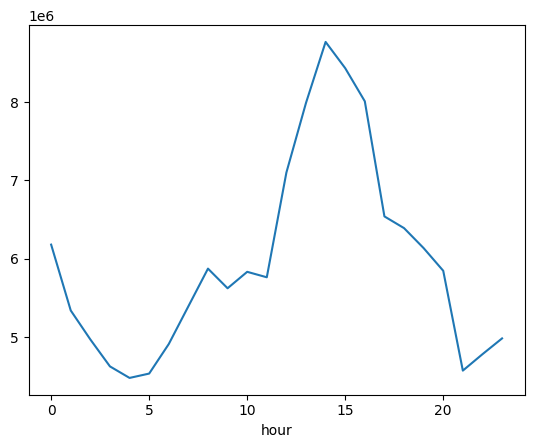

In [11]:
data.groupby(['hour'])['Volume'].sum().plot()

<Axes: xlabel='hour'>

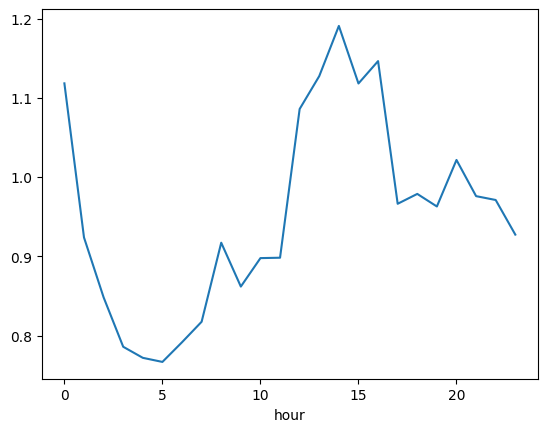

In [12]:
data.groupby(['hour'])['var'].mean().plot()

In [13]:
data.groupby(['hour'])['var'].mean()

hour
0     1.118267
1     0.923868
2     0.848346
3     0.785988
4     0.772037
5     0.766871
6     0.791700
7     0.817553
8     0.917248
9     0.861919
10    0.897821
11    0.898318
12    1.085916
13    1.127423
14    1.190715
15    1.118103
16    1.146328
17    0.966363
18    0.978809
19    0.962947
20    1.021642
21    0.975993
22    0.971131
23    0.927460
Name: var, dtype: float64